<a href="https://colab.research.google.com/github/jpatra85/ColabTF_EDU/blob/master/DL_Colab_Loan%20Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/df_ft_out.csv"

'/content/drive/My Drive/df_ft_out.csv'


In [0]:
# All features
#import pandas as pd
#df = pd.read_csv('/content/drive/My Drive/df_ft_out_all_ft.csv')
#df.drop('Unnamed: 0',axis = 1, inplace = True)

In [0]:
# Selective features
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/df_ft_out.csv')

In [0]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling
print(tf.__version__)


2.2.0


In [15]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop('loan_amount')
train_stats = train_stats.transpose()
train_stats

train_labels = train_dataset.pop('loan_amount')
test_labels = test_dataset.pop('loan_amount')

train_dataset.head()


,Unnamed: 0,home_ownership,sanitary_availability,savings,sex_F,sex_M,sex_TG,type_of_house_type_of_house0,type_of_house_type_of_houseR,type_of_house_type_of_houseT1,type_of_house_type_of_houseT2,water_availabity_water_availabity0.0,water_availabity_water_availabity0.5,water_availabity_water_availabity1.0,age_bins_age0,age_bins_age1,age_bins_age2,age_bins_age3,primary_business_bins_primary_business0,primary_business_bins_primary_business1,primary_business_bins_primary_business2,primary_business_bins_primary_business3,primary_business_bins_primary_business4,loan_purpose_bins_loan_purpose0,loan_purpose_bins_loan_purpose1,loan_purpose_bins_loan_purpose2,loan_purpose_bins_loan_purpose3,annual_income_bins_income_group0,annual_income_bins_income_group1,annual_income_bins_income_group2,annual_income_bins_income_group3,annual_income_bins_income_group4,monthly_expense_bins_monthly_expense0,monthly_expense_bins_monthly_expense1,monthly_expense_bins_monthly_expense2,monthly_expense_bins_monthly_expense3,monthly_expense_bins_monthly_expense4,young_dependents_bins_young_dependents0,young_dependents_bins_young_dependents1,young_dependents_bins_young_dependents2,young_dependents_bins_young_dependents3,occupants_count_bins_occupants_grounps0,occupants_count_bins_occupants_grounps1,occupants_count_bins_occupants_grounps2,occupants_count_bins_occupants_grounps3,house_area_bins_house_area_group0,house_area_bins_house_area_group1,house_area_bins_house_area_group2,house_area_bins_house_area_group3,loan_installment_bins_loan_installment_group0,loan_installment_bins_loan_installment_group1,loan_installment_bins_loan_installment_group2,loan_tenure_bins_loan_tenure_group0,loan_tenure_bins_loan_tenure_group1,loan_tenure_bins_loan_tenure_group2,loan_tenure_bins_loan_tenure_group3
4914,4914,1.0,1.0,-24000.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
393,393,1.0,1.0,-3400.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
6103,6103,1.0,1.0,-15000.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
15459,15459,1.0,1.0,-22800.0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
4225,4225,1.0,1.0,-30000.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
  
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)



In [17]:
print(df.isnull().sum().sum())
print(normed_train_data.isnull().sum().sum())
print(normed_test_data.isnull().sum().sum())
normed_train_data.head()

0
0
0


,Unnamed: 0,home_ownership,sanitary_availability,savings,sex_F,sex_M,sex_TG,type_of_house_type_of_house0,type_of_house_type_of_houseR,type_of_house_type_of_houseT1,type_of_house_type_of_houseT2,water_availabity_water_availabity0.0,water_availabity_water_availabity0.5,water_availabity_water_availabity1.0,age_bins_age0,age_bins_age1,age_bins_age2,age_bins_age3,primary_business_bins_primary_business0,primary_business_bins_primary_business1,primary_business_bins_primary_business2,primary_business_bins_primary_business3,primary_business_bins_primary_business4,loan_purpose_bins_loan_purpose0,loan_purpose_bins_loan_purpose1,loan_purpose_bins_loan_purpose2,loan_purpose_bins_loan_purpose3,annual_income_bins_income_group0,annual_income_bins_income_group1,annual_income_bins_income_group2,annual_income_bins_income_group3,annual_income_bins_income_group4,monthly_expense_bins_monthly_expense0,monthly_expense_bins_monthly_expense1,monthly_expense_bins_monthly_expense2,monthly_expense_bins_monthly_expense3,monthly_expense_bins_monthly_expense4,young_dependents_bins_young_dependents0,young_dependents_bins_young_dependents1,young_dependents_bins_young_dependents2,young_dependents_bins_young_dependents3,occupants_count_bins_occupants_grounps0,occupants_count_bins_occupants_grounps1,occupants_count_bins_occupants_grounps2,occupants_count_bins_occupants_grounps3,house_area_bins_house_area_group0,house_area_bins_house_area_group1,house_area_bins_house_area_group2,house_area_bins_house_area_group3,loan_installment_bins_loan_installment_group0,loan_installment_bins_loan_installment_group1,loan_installment_bins_loan_installment_group2,loan_tenure_bins_loan_tenure_group0,loan_tenure_bins_loan_tenure_group1,loan_tenure_bins_loan_tenure_group2,loan_tenure_bins_loan_tenure_group3
4914,-1.295095,0.163464,0.671033,-0.755924,0.250247,-0.249885,-0.012652,-0.1136,-0.433979,-0.783910,1.109687,-0.381284,1.163229,-0.901068,-0.391516,-0.771717,1.383449,-0.421147,-0.040438,0.839818,-0.826913,-0.061314,-0.046013,-0.451049,-0.443163,0.892064,-0.351431,1.512087,-0.564747,-0.72132,-0.243607,-0.242721,-0.400387,-0.187322,2.561927,-0.789028,-0.673442,-0.751777,0.929656,-0.337003,-0.022637,-0.373812,1.517248,-1.146547,-0.081475,-1.081536,1.254908,-0.264113,-0.085745,0.596642,-0.590872,-0.061314,-0.102374,0.612637,-0.077603,-0.587421
393,-1.696245,0.163464,0.671033,0.024865,0.250247,-0.249885,-0.012652,-0.1136,-0.433979,1.275617,-0.901126,-0.381284,1.163229,-0.901068,-0.391516,-0.771717,-0.722808,2.374390,-0.040438,0.839818,-0.826913,-0.061314,-0.046013,2.216982,-0.443163,-1.120960,-0.351431,-0.661316,1.770647,-0.72132,-0.243607,-0.242721,-0.400387,-0.187322,-0.390319,1.267342,-0.673442,1.330139,-1.075633,-0.337003,-0.022637,-0.373812,1.517248,-1.146547,-0.081475,0.924581,-0.796846,-0.264113,-0.085745,0.596642,-0.590872,-0.061314,-0.102374,0.612637,-0.077603,-0.587421
6103,-1.189595,0.163464,0.671033,-0.414803,0.250247,-0.249885,-0.012652,-0.1136,-0.433979,-0.783910,1.109687,-0.381284,1.163229,-0.901068,-0.391516,1.295770,-0.722808,-0.421147,-0.040438,0.839818,-0.826913,-0.061314,-0.046013,2.216982,-0.443163,-1.120960,-0.351431,1.512087,-0.564747,-0.72132,-0.243607,-0.242721,2.497503,-0.187322,-0.390319,-0.789028,-0.673442,-0.751777,0.929656,-0.337003,-0.022637,-0.373812,-0.659067,0.872156,-0.081475,-1.081536,1.254908,-0.264113,-0.085745,0.596642,-0.590872,-0.061314,-0.102374,0.612637,-0.077603,-0.587421
15459,-0.359435,0.163464,0.671033,-0.710441,0.250247,-0.249885,-0.012652,-0.1136,-0.433979,1.275617,-0.901126,-0.381284,-0.859648,1.109759,2.554094,-0.771717,-0.722808,-0.421147,-0.040438,0.839818,-0.826913,-0.061314,-0.046013,-0.451049,2.256433,-1.120960,-0.351431,-0.661316,1.770647,-0.72132,-0.243607,-0.242721,-0.400387,-0.187322,-0.390319,1.267342,-0.673442,-0.751777,0.929656,-0.337003,-0.022637,-0.373812,-0.659067,0.872156,-0.081475,0.924581,-0.796846,-0.264113,-0.085745,-1.675995,1.692361,-0.061314,-0.102374,-1.632237,-0.077603,1.702303
4225,-1.356231,0.163464,0.67103

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.2),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mape', 'mse'])
  return model

In [19]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7296      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [20]:
history = model.fit(normed_train_data, train_labels,
  epochs= 125,batch_size = 128 , validation_split = 0.25)

Epoch 1/125
184/184 [==============================] - 1s 6ms/step - loss: 196044256.0000 - mape: 39.9383 - mse: 196044256.0000 - val_loss: 108151776.0000 - val_mape: 20.6661 - val_mse: 108151776.0000
Epoch 2/125
184/184 [==============================] - 1s 5ms/step - loss: 176286064.0000 - mape: 23.8348 - mse: 176286064.0000 - val_loss: 103755376.0000 - val_mape: 27.6415 - val_mse: 103755368.0000
Epoch 3/125
184/184 [==============================] - 1s 5ms/step - loss: 173939216.0000 - mape: 23.9853 - mse: 173939216.0000 - val_loss: 101463176.0000 - val_mape: 21.0753 - val_mse: 101463176.0000
Epoch 4/125
184/184 [==============================] - 1s 5ms/step - loss: 172121040.0000 - mape: 23.5847 - mse: 172121040.0000 - val_loss: 101670568.0000 - val_mape: 20.1011 - val_mse: 101670568.0000
Epoch 5/125
184/184 [==============================] - 1s 5ms/step - loss: 173448352.0000 - mape: 23.1681 - mse: 173448352.0000 - val_loss: 99753728.0000 - val_mape: 22.2314 - val_mse: 99753720.00

In [21]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions.max()

451492.97

In [22]:
test_mape = (100*abs(test_labels.values - test_predictions)/test_labels.values).mean()
print("test_mape: ", test_mape)

test_mape:  19.470345104631217


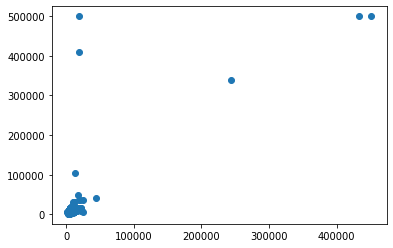

In [23]:
import matplotlib.pyplot as plt
plt.scatter(test_predictions,test_labels)

9400501.955078125

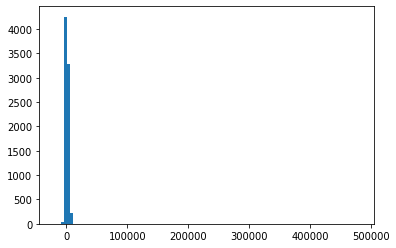

In [24]:
import matplotlib.pyplot as plt
plt.hist((test_labels.values - test_predictions), bins = 100)
(test_labels.values - test_predictions).mean()
(test_labels.values - test_predictions).sum()